# Proyecto
______________

API: https://dev.adalab.es/cinema/
Endpoint : https://dev.adalab.es/api/cinema/movies?year=2010&genre=Drama

In [1]:
#Importar librerías para su posterior uso en el código
import tqdm
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import datetime
import json
from time import sleep
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# Importar librerías de Selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select

In [2]:

# Lista de años buscados: 15 años
anio_lista = list(range(2009, 2025))

# Lista de géneros
generos_lista = ["Drama", "Comedy", "Action", "Fantasy", "Horror", "Mystery", "Romance", "Thriller"]

# Lista vacía en la cual almacenaremos los datos extrañidos de la API
datos_peliculas = []

# Bucle para iterar por año y género
for anio in anio_lista:
    for genero in generos_lista:
        # Determinar URL
        url_movies = f"https://dev.adalab.es/api/cinema/movies?year={anio}&genre={genero}"
        
        # Llamada a API
        res_url_movies = requests.get(url_movies)
        
        # Pausa para la API
        sleep(1) 
        
        # Verificar la espuesta de la API
        if res_url_movies.status_code == 200:
            try:
                json_url_general = res_url_movies.json()
                
                # Imprimir jason para verlo
                print(f"Response for {anio} - {genero}: {json_url_general}")
                
                # Verificar si la llamada tiene la info correcta
                if isinstance(json_url_general, dict) and 'results' in json_url_general:
                    movies = json_url_general['results']
                    
                    # Verificar que es lista
                    if isinstance(movies, list):
                        # Bucle por película para extraer info
                        for pelicula in movies:
                            id = pelicula.get("id")
                            titulo = pelicula.get("title")
                            tipo = pelicula.get("type")
                            anio = pelicula.get("year")
                            genero = pelicula.get("genre")
                            
                            # Añadir info a la lista anteriormente vacía
                            datos_peliculas.append({
                                "id": id,
                                "title": titulo,
                                "type": tipo,
                                "year": anio,
                                "genre": genero
                            })
                    else:
                        print("Expected 'results' to be a list.")
                else:
                    print("Expected JSON structure not found.")
            except json.JSONDecodeError:
                print("Error decoding JSON response.")
        else:
            print(f"Error: {res_url_movies.status_code} - {res_url_movies.reason}")

# Convertir a pandas frame
df_peliculas = pd.DataFrame(datos_peliculas)

# Salvar la busqueda en un documento con formato CSV
df_peliculas.to_csv("movies_last_15_years.csv", index=False)

print("Data extraction complete and saved to movies_last_15_years.csv.")


Response for 2009 - Drama: {'info': {'count': 10}, 'results': [{'id': 59404, 'title': 'Apaföld', 'type': 'Movie', 'year': '2009', 'genre': 'Drama', 'idOwner': 'tt0143558', 'image': 'https://m.media-amazon.com/images/M/MV5BYjA5Y2M3ZDAtNjg4OC00ZDQ5LWI4MzgtM2E0NTdjZmUwZjE1XkEyXkFqcGdeQXVyNDYzMDMxOTc@._V1_.jpg'}, {'id': 59405, 'title': 'Rózsaszín sajt', 'type': 'Movie', 'year': '2009', 'genre': 'Drama', 'idOwner': 'tt0153140', 'image': 'https://m.media-amazon.com/images/M/MV5BMjE2NDAxNDE0Nl5BMl5BanBnXkFtZTgwMTU1MjQwNjE@._V1_.jpg'}, {'id': 59406, 'title': 'Sanam Teri Kasam', 'type': 'Movie', 'year': '2009', 'genre': 'Drama', 'idOwner': 'tt0205380', 'image': 'https://m.media-amazon.com/images/M/MV5BYjc3MGNhMmItMjljOS00NjY5LThlMmQtYWM1NWZiOGJlY2EyXkEyXkFqcGdeQXVyMjU4NDY1ODA@._V1_.jpg'}, {'id': 59407, 'title': 'Twice as Dead', 'type': 'Movie', 'year': '2009', 'genre': 'Drama', 'idOwner': 'tt0254832', 'image': 'https://m.media-amazon.com/images/M/MV5BMTI2NjA5NDkyMl5BMl5BanBnXkFtZTcwNjAxNTEwMw@@

In [3]:
print(datos_peliculas)
print(type(datos_peliculas))

[{'id': 59404, 'title': 'Apaföld', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59405, 'title': 'Rózsaszín sajt', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59406, 'title': 'Sanam Teri Kasam', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59407, 'title': 'Twice as Dead', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59408, 'title': 'Railed', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59409, 'title': 'Coraline', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59410, 'title': 'Mitsein', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59411, 'title': 'Blood and Bone', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59412, 'title': 'Inglourious Basterds', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59413, 'title': 'The Box', 'type': 'Movie', 'year': '2009', 'genre': 'Drama'}, {'id': 59444, 'title': 'I Miss Sonia Henie', 'type': 'Short', 'year': '2009', 'genre': 'Comedy'},

# Necesitamos la siguiente información: **SELENIUM**

1- Puntuación de IMDB (en caso de que la tenga).

2- Dirección (director/a o directores/as de cada película).

3- Guionistas (de cada película).

4- Argumento.

5- Nombre de la película.

6- Id de la película.

In [4]:
titulo_peli_api = [titulo ["title"]for titulo in datos_peliculas]
print(titulo_peli_api)

['Apaföld', 'Rózsaszín sajt', 'Sanam Teri Kasam', 'Twice as Dead', 'Railed', 'Coraline', 'Mitsein', 'Blood and Bone', 'Inglourious Basterds', 'The Box', 'I Miss Sonia Henie', 'El reino de los cielos', 'Unter Strom', 'Chinango', 'Mutant Swinger from Mars', 'Los muertos van deprisa', 'Two-Minute Heist', 'Astro Boy', 'Whiteout', 'Sterling: The Secret of the Lost Medallion', 'Watchmen', 'Harry Potter en de halfbloed prins', 'The Haunted World of El Superbeasto', 'Royal Kill', 'The Magic Stone', 'Malice in Wonderland', 'The Lovely Bones', 'Skellig', 'Max en de maximonsters', 'Proinhibition', 'The Dream of Alvareen', 'T.M.A.', 'El libro de piedra', 'Possession', 'It Came from Trafalgar', 'Cabeza de pescado', 'Silo Killer 2: The Wrath of Kyle', 'Daybreakers', 'Cabras', 'Town Creek', 'Moonlight Blade', 'Cargo', 'House of Boys', 'Youth in Revolt', 'Utolsó jelentés Annáról', 'The Perfect Sleep', 'AmerAsian', 'Why George?', 'Kisse Pyaar Karoon?', 'Yesterday Was a Lie', '1', 'Pál Adrienn', 'Oda az

In [5]:
# Sacar titulos de peliculas y almacenarlo en una variable
titulo_peli_api = [titulo ["title"]for titulo in datos_peliculas]
print(titulo_peli_api)

#Iniciar el navegador
driver = webdriver.Chrome()
print("Abriendo Google")

# Maximizar la ventana del navegador
driver.maximize_window()
print("Pantalla maximizada")
sleep(3)

#Abrir página web
driver.get("https://www.imdb.com/")
print("Accediendo a la web")
sleep(3)

#COOKIES
driver.find_element("css selector", "#__next > div > div > div.sc-jrcTuL.bPmWiM > div > button.icb-btn.sc-bcXHqe.sc-dkrFOg.sc-iBYQkv.dcvrLS.ddtuHe.dRCGjd").click()
print("Cookies aceptadas")
sleep(5)

# Diccionario vacío en dónde se almacenarán los datos
datos_imdb = {"puntuacion":[], "direcccion":[], "guionista":[], "argumento":[], "nombre_pelicula":[], "id_pelicula":[]}

# Iterar sobre los títulos de las películas
for titulo in  titulo_peli_api:
  buscador = driver.find_element("css selector", "#suggestion-search").send_keys(titulo, Keys.ENTER)
  sleep(5)
  try:
    # Entrar a las películas
    encontrado = driver.find_element("link text",f"{titulo}").click()
    if encontrado == True:
      # Extraer puntuación
      puntuacion = driver.find_element("css selector", f"#__next > main > div > section.ipc-page-background.ipc-page-background--base.sc-afa4bed1-0.iMxoKo > section > div:nth-child(5) > section > section > div.sc-491663c0-3.kNMkxz > div.sc-3a4309f8-0.jJkxPn.sc-1f50b7c-1.doVJqQ > div > div:nth-child({titulo}) > a > span > div > div.sc-eb51e184-0.ghvwpw > div.sc-eb51e184-2.fAhXAe > span.sc-eb51e184-1.ljxVSS").text
      datos_imdb["puntuacion"].append(puntuacion)
      print(f"datos_imdb {puntuacion}")
      # Extraer dirección
      direccion = driver.find_element("css selector", f"#__next > main > div > section.ipc-page-background.ipc-page-background--base.sc-afa4bed1-0.iMxoKo > section > div:nth-child(5) > section > section > div.sc-491663c0-4.gxWIhN > div.sc-491663c0-6.etrlfo > div.sc-491663c0-10.iaQXlA > section > div.sc-1f50b7c-3.gLpgJQ > div > ul > li:nth-child({titulo}) > div > ul > li > a").text
      datos_imdb["direccion"].append(direccion)
      print(f"datos_imdb{direccion}")
      # Extraer guionista
      guionista = driver.find_element("css selector", f"#__next > main > div > section.ipc-page-background.ipc-page-background--base.sc-afa4bed1-0.iMxoKo > section > div:nth-child(5) > section > section > div.sc-491663c0-4.gxWIhN > div.sc-491663c0-6.etrlfo > div.sc-491663c0-11.hpMyOS > div.sc-1f50b7c-2.cpicUu > div > ul > li:nth-child({titulo}) > div > ul > li > a").text
      datos_imdb["guionista"].append(guionista)
      print(f"datos_imdb{guionista}")
      # Extraer sinópsis
      argumento = driver.find_element("css selector", f"#__next > main > div > section.ipc-page-background.ipc-page-background--base.sc-afa4bed1-0.iMxoKo > section > div:nth-child({titulo}) > section > section > div.sc-491663c0-4.ILcwq > div.sc-491663c0-6.bvzCJs > div.sc-491663c0-10.tkbDg > section > p > span.sc-2d37a7c7-1.dCcJCA").text
      datos_imdb["argumento"].append(argumento)
      print(f"datos_imdb{argumento}")
      # Extraer nombre de la película, aunque esté arriba en la variable de títulos desde API
      nombre_pelicula = driver.find_element("css selector", f"#__next > main > div > section.ipc-page-background.ipc-page-background--base.sc-afa4bed1-0.iMxoKo > section > div:nth-child({titulo}) > section > section > div.sc-491663c0-3.kNMkxz > div.sc-1f50b7c-0.iPPbjm > h1 > span").text
      datos_imdb["nombre_pelicula"].append(nombre_pelicula)
      print(f"datos_imdb{nombre_pelicula}")
      # Extraer id película de IMDB
      id_pelicula = driver.current_url.split("/")[4]
      datos_imdb["id_pelicula"].append(id_pelicula) #tt014355
      print(f"datos_imdb{id_pelicula}")

  # Se da una excepción y en caso de haber excepciones, se guardan en la variable:  variable_excepciones_titulos_api
  # La excepción Exception engloba todos los tipos de excepciones
  except Exception as variable_excepciones_titulos_api: 
          print(f"Error al procesar la película '{titulo}': {variable_excepciones_titulos_api}")
          continue
print(datos_imdb)

# Cerrar el navegador
driver.quit()

['Apaföld', 'Rózsaszín sajt', 'Sanam Teri Kasam', 'Twice as Dead', 'Railed', 'Coraline', 'Mitsein', 'Blood and Bone', 'Inglourious Basterds', 'The Box', 'I Miss Sonia Henie', 'El reino de los cielos', 'Unter Strom', 'Chinango', 'Mutant Swinger from Mars', 'Los muertos van deprisa', 'Two-Minute Heist', 'Astro Boy', 'Whiteout', 'Sterling: The Secret of the Lost Medallion', 'Watchmen', 'Harry Potter en de halfbloed prins', 'The Haunted World of El Superbeasto', 'Royal Kill', 'The Magic Stone', 'Malice in Wonderland', 'The Lovely Bones', 'Skellig', 'Max en de maximonsters', 'Proinhibition', 'The Dream of Alvareen', 'T.M.A.', 'El libro de piedra', 'Possession', 'It Came from Trafalgar', 'Cabeza de pescado', 'Silo Killer 2: The Wrath of Kyle', 'Daybreakers', 'Cabras', 'Town Creek', 'Moonlight Blade', 'Cargo', 'House of Boys', 'Youth in Revolt', 'Utolsó jelentés Annáról', 'The Perfect Sleep', 'AmerAsian', 'Why George?', 'Kisse Pyaar Karoon?', 'Yesterday Was a Lie', '1', 'Pál Adrienn', 'Oda az

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#suggestion-search"}
  (Session info: chrome=128.0.6613.113); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6DEBBB632+29090]
	(No symbol) [0x00007FF6DEB2E6E9]
	(No symbol) [0x00007FF6DE9EB1CA]
	(No symbol) [0x00007FF6DEA3EFD7]
	(No symbol) [0x00007FF6DEA3F22C]
	(No symbol) [0x00007FF6DEA897F7]
	(No symbol) [0x00007FF6DEA6672F]
	(No symbol) [0x00007FF6DEA865D9]
	(No symbol) [0x00007FF6DEA66493]
	(No symbol) [0x00007FF6DEA309B1]
	(No symbol) [0x00007FF6DEA31B11]
	GetHandleVerifier [0x00007FF6DEED883D+3294125]
	GetHandleVerifier [0x00007FF6DEF24423+3604371]
	GetHandleVerifier [0x00007FF6DEF1A2E7+3563095]
	GetHandleVerifier [0x00007FF6DEC76F16+797318]
	(No symbol) [0x00007FF6DEB3986F]
	(No symbol) [0x00007FF6DEB35454]
	(No symbol) [0x00007FF6DEB355E0]
	(No symbol) [0x00007FF6DEB24A7F]
	BaseThreadInitThunk [0x00007FF98959257D+29]
	RtlUserThreadStart [0x00007FF98B72AF28+40]


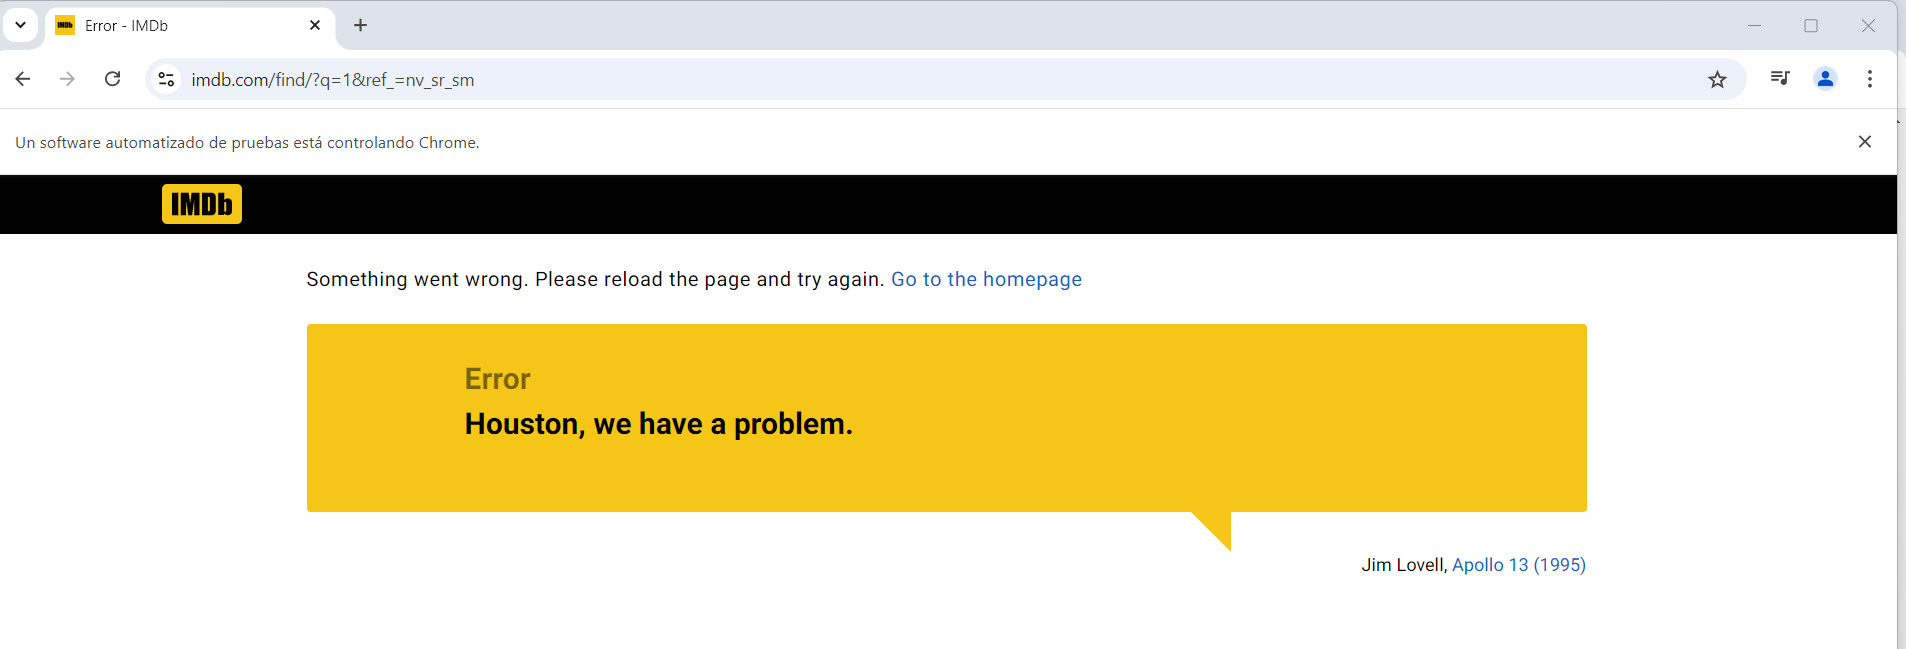

In [6]:
print(datos_imdb)

{'puntuacion': [], 'direcccion': [], 'guionista': [], 'argumento': [], 'nombre_pelicula': [], 'id_pelicula': []}
